In [66]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten,Dense
from tensorflow.keras.models import Sequential,Model
from glob import glob
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [67]:
mask_array = [x for x in glob('/content/drive/My Drive/mask dataset/Testing/masked/*')]
normal_array = [x for x in glob('/content/drive/My Drive/mask dataset/Testing/not masked/*')]

In [68]:
mask_array = mask_array[:5]
mask_array

['/content/drive/My Drive/mask dataset/Testing/masked/39.jpg',
 '/content/drive/My Drive/mask dataset/Testing/masked/12.jpg',
 '/content/drive/My Drive/mask dataset/Testing/masked/37.jpg',
 '/content/drive/My Drive/mask dataset/Testing/masked/5.jpg',
 '/content/drive/My Drive/mask dataset/Testing/masked/14.jpg']

In [69]:
normal_array = normal_array[:5]
normal_array

['/content/drive/My Drive/mask dataset/Testing/not masked/masked29.jpg',
 '/content/drive/My Drive/mask dataset/Testing/not masked/masked26.jpg',
 '/content/drive/My Drive/mask dataset/Testing/not masked/masked1.jpg',
 '/content/drive/My Drive/mask dataset/Testing/not masked/masked10.jpg',
 '/content/drive/My Drive/mask dataset/Testing/not masked/masked27.jpg']

In [70]:
normal_array

['/content/drive/My Drive/mask dataset/Testing/not masked/masked29.jpg',
 '/content/drive/My Drive/mask dataset/Testing/not masked/masked26.jpg',
 '/content/drive/My Drive/mask dataset/Testing/not masked/masked1.jpg',
 '/content/drive/My Drive/mask dataset/Testing/not masked/masked10.jpg',
 '/content/drive/My Drive/mask dataset/Testing/not masked/masked27.jpg']

In [71]:
from IPython.display import Image
import matplotlib.image as mpimg

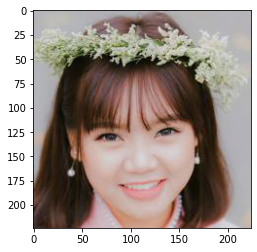

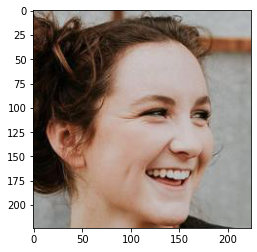

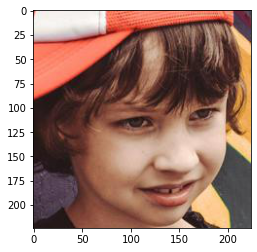

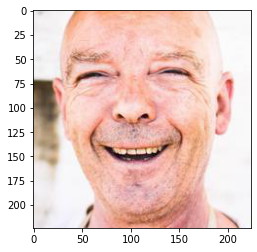

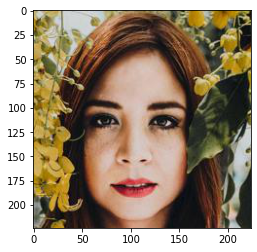

In [72]:
for i in normal_array:  
  img=mpimg.imread(i)
  imgplot = plt.imshow(img)
  plt.show()

In [73]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape = [224,224,3]))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1024,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2,activation = 'softmax'))

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 110, 110, 32)      128       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 106, 106, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 53, 53, 64)       

In [75]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [76]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   shear_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [77]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/mask dataset/Training',
                                                 target_size = (224,224),
                                                 class_mode = 'categorical',
                                                 batch_size = 32)
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/mask dataset/Testing',
                                            target_size = (224,224),
                                            class_mode = 'categorical',
                                            batch_size = 32)

Found 727 images belonging to 2 classes.
Found 147 images belonging to 2 classes.


In [78]:
r = model.fit_generator(training_set,
                        steps_per_epoch = len(training_set),
                        epochs = 50,
                        validation_data = test_set,
                        validation_steps = len(test_set))

Epoch 1/50
23/23 [==============================] - 12s 538ms/step - loss: 2.1207 - accuracy: 0.7923 - val_loss: 6.6128 - val_accuracy: 0.5578
Epoch 2/50
23/23 [==============================] - 12s 526ms/step - loss: 1.0335 - accuracy: 0.8556 - val_loss: 6.0713 - val_accuracy: 0.4898
Epoch 3/50
23/23 [==============================] - 12s 526ms/step - loss: 0.6594 - accuracy: 0.8707 - val_loss: 0.9717 - val_accuracy: 0.5374
Epoch 4/50
23/23 [==============================] - 12s 522ms/step - loss: 0.4001 - accuracy: 0.8817 - val_loss: 0.9593 - val_accuracy: 0.3129
Epoch 5/50
23/23 [==============================] - 12s 523ms/step - loss: 0.2748 - accuracy: 0.9037 - val_loss: 0.8346 - val_accuracy: 0.5170
Epoch 6/50
23/23 [==============================] - 12s 518ms/step - loss: 0.2413 - accuracy: 0.9147 - val_loss: 1.4659 - val_accuracy: 0.4830
Epoch 7/50
23/23 [==============================] - 12s 533ms/step - loss: 0.2285 - accuracy: 0.9161 - val_loss: 1.1757 - val_accuracy: 0.4830

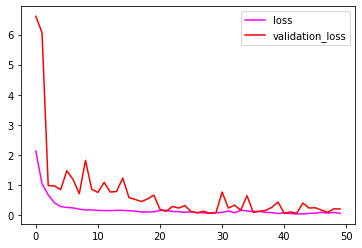

In [79]:
plt.plot(r.history['loss'],label = 'loss',color = 'magenta')
plt.plot(r.history['val_loss'],label = 'validation_loss',color = 'red')
plt.legend()
plt.show()

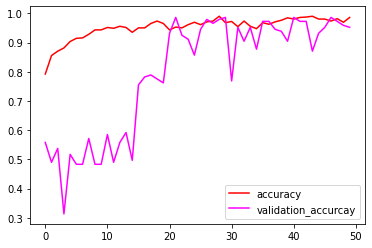

In [80]:
plt.plot(r.history['accuracy'],label = 'accuracy',color = 'red')
plt.plot(r.history['val_accuracy'],label = 'validation_accurcay',color = 'magenta')
plt.legend()
plt.show()

In [81]:
predict = load_img('/content/drive/My Drive/mask dataset/valid/asian_mask101.jpg',target_size=(224,224))
x = image.img_to_array(predict)
z = np.expand_dims(x,axis = 0)
result = model.predict(z)
#final = np.argmax(result, axis=1)
if result[0][0]== 1:
  print('Person is wearing the mask')
else:
  print('Person is not wearning the mask')

Person is wearing the mask


In [82]:
model.save('maskdetection1.h5')

In [83]:
validate_list = [x for x in glob('/content/drive/My Drive/mask dataset/valid/*')]
predicted_labels = []
for i in validate_list:
  predict = load_img(i,target_size=(224,224))
  x = image.img_to_array(predict)
  z = np.expand_dims(x,axis = 0)
  result = model.predict(z)
  if result[0][0] == 1:
    predicted_labels.append('Person is Wearning mask')
  else:
    predicted_labels.append('Person is not Wearning mask')

In [84]:
validate_list_1 = validate_list[0:10]

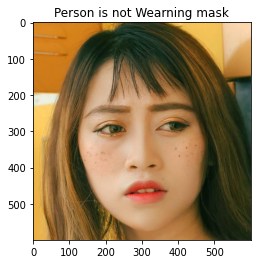

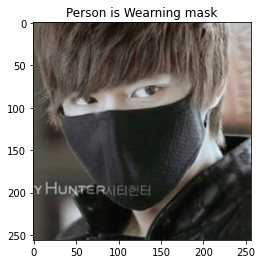

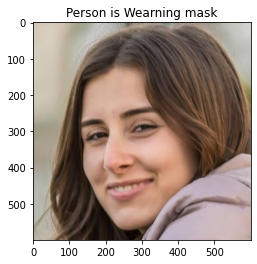

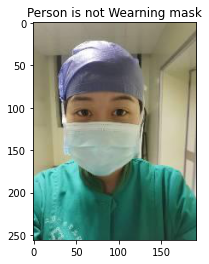

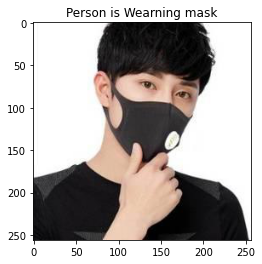

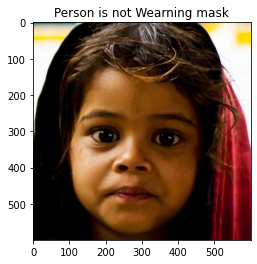

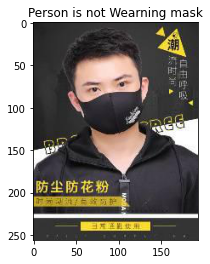

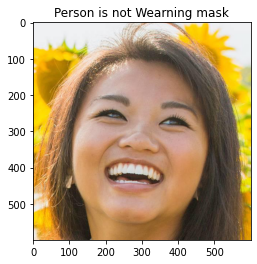

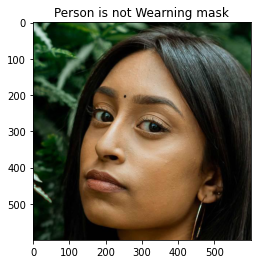

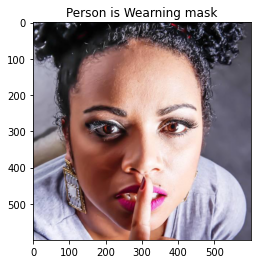

In [85]:
for i,j in zip(validate_list_1,predicted_labels):
  img = mpimg.imread(i)
  imgplot = plt.imshow(img)
  plt.title(j)
  plt.show()
  

